In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import cv2
import scipy.io
import matplotlib.pyplot as plt


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_hoda = '/content/drive/My Drive/Data_hoda_full.mat'  # Replace the address :)

 # Upload the dataset from google drive
hoda=scipy.io.loadmat(data_hoda)
#  Split the data into test and training sets
X = hoda['Data'].reshape(-1)
X = np.array([cv2.resize(img, dsize=(10, 10)) for img in X])
X = [cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)[1] for img in X]
X = np.array([np.reshape(img, newshape=(100,)) for img in X])
y = hoda['labels'].reshape(-1)


In [ ]:
# Create a model
train_image, test_image, train_labels, test_lables = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
sigmoid = lambda x : 1/(1+np.exp(-x))

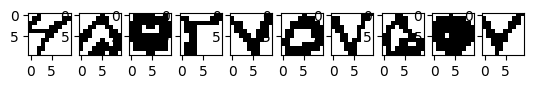

  6 5 0 2 7 0 7 5 0 7 


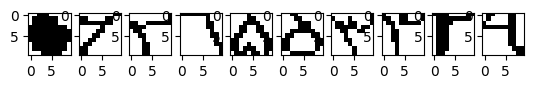

  0 6 3 6 5 5 3 3 2 9 


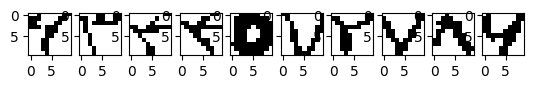

  6 3 4 4 0 7 2 7 8 6 


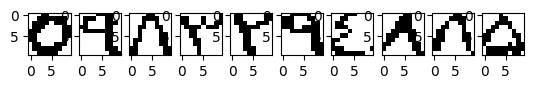

  0 9 8 3 2 9 4 8 8 5 


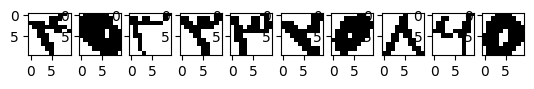

  4 0 3 3 3 2 0 8 6 0 


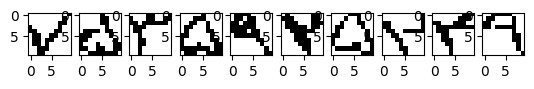

  7 5 3 5 9 2 5 3 4 9 


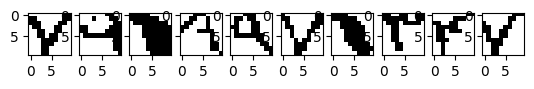

  7 9 1 9 9 7 1 3 4 7 


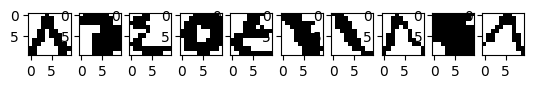

  8 1 4 0 4 1 1 8 1 8 


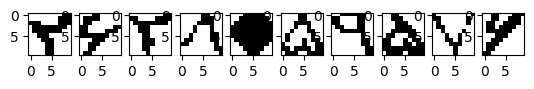

  2 6 2 8 0 5 9 5 7 6 


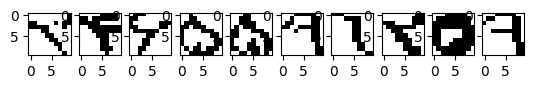

  3 4 6 5 5 9 6 2 0 9 


In [ ]:
snum='  '
for i in range(100):
    plt.subplot(1,10,i%10+1)
    img = X[i].reshape(10,10)
    plt.imshow(img, cmap='gray_r')
    snum += str(y[i]) + ' '
    if(i!=0 and (i+1)%10==0):
        plt.show()
        print(snum)
        snum = '  '

In [ ]:
def fit_regression_logistic(X, y):
    W = []

    tolerance = 1e-3
    m = len(X)
    X = np.c_[np.ones(m), X]


    for c in np.unique(y):
        y1 = pd.factorize(y==c,sort=True)[0].reshape(-1,1)
        alpha = 0.01
        w = np.zeros((X.shape[1],1))

        for epoch in tqdm(range(100000)):
            y_hat = sigmoid(X.dot(w))

            grad = X.T.dot(y_hat-y1)
            w -= alpha*grad/m

            if np.abs((alpha*grad).mean())<=tolerance:
                break
        W.append(w)
    return W

In [ ]:
#Calculate the accuracy for training and test data
def predict(X):
    X = np.array(X)
    X = np.c_[np.ones(len(X)), X]
    return np.argmax(sigmoid(X.dot(W)),axis=1)

In [ ]:
W = fit_regression_logistic(train_image,train_labels)

  0%|          | 0/100000 [00:00<?, ?it/s]

<ipython-input-14-4fb94fc0a6bf>:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x : 1/(1+np.exp(-x))


  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

  0%|          | 0/100000 [00:00<?, ?it/s]

In [ ]:
print('Accuracy train = ',accuracy_score(train_labels, predict(train_image)))
print('Accuracy test  = ',accuracy_score(test_lables, predict(test_image)))
print('Confusion matrix :\n',confusion_matrix(y, predict(X)))

Accuracy train =  0.9118333333333334
Accuracy test  =  0.9063333333333333
Confusion matrix :
 [[5790   72    2    9   27   59    5    6    5   25]
 [ 308 5365    7   15  121    0   97    5    3   79]
 [  11  396 5102  124   69    0   50   56   29  163]
 [   9   45  228 5540  113    3   15    4    6   37]
 [ 122  137   93  156 5357   21   11    7   17   79]
 [ 367  166   17    1   21 5408    5    1    6    8]
 [  44  342   99   30   30    3 5070   20   16  346]
 [  88   88   42    3   11   10   44 5696    7   11]
 [  13   85    6    0    7   22   20    0 5767   80]
 [  36  192    7    4   15    0  192    1    4 5549]]


<ipython-input-14-4fb94fc0a6bf>:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x : 1/(1+np.exp(-x))
<ipython-input-14-4fb94fc0a6bf>:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x : 1/(1+np.exp(-x))
<ipython-input-14-4fb94fc0a6bf>:1: RuntimeWarning: overflow encountered in exp
  sigmoid = lambda x : 1/(1+np.exp(-x))
